In [1]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import glob
from matplotlib.colors import Normalize, LogNorm, PowerNorm
import cv2
import PIL

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt
from matplotlib import cm



def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels


In [2]:
def imshow(a):
    a = a.clip(0, 255).astype("uint8")
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))

In [3]:
path_out = '20240507_cut_npy/'
files = glob.glob(path_out+"*")
files.sort()

In [45]:
dx= 5.106500953873407
dt= 0.0016

data = []
first_file = '20240507_cut_npy/090622.npy' #\\
last_file = '20240507_cut_npy/090812.npy' #\\
for file in files:
   if file >= first_file and file <= last_file:
      print(file)
      data.append(np.load(file))

data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_file.split("/")[-1].split(".")[0], "%Y-%m-%d %H%M%S") #\\
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)

20240507_cut_npy/090622.npy
20240507_cut_npy/090632.npy
20240507_cut_npy/090642.npy
20240507_cut_npy/090652.npy
20240507_cut_npy/090702.npy
20240507_cut_npy/090712.npy
20240507_cut_npy/090722.npy
20240507_cut_npy/090732.npy
20240507_cut_npy/090742.npy
20240507_cut_npy/090752.npy
20240507_cut_npy/090802.npy
20240507_cut_npy/090812.npy


AxesImage(shape=(75000, 52))


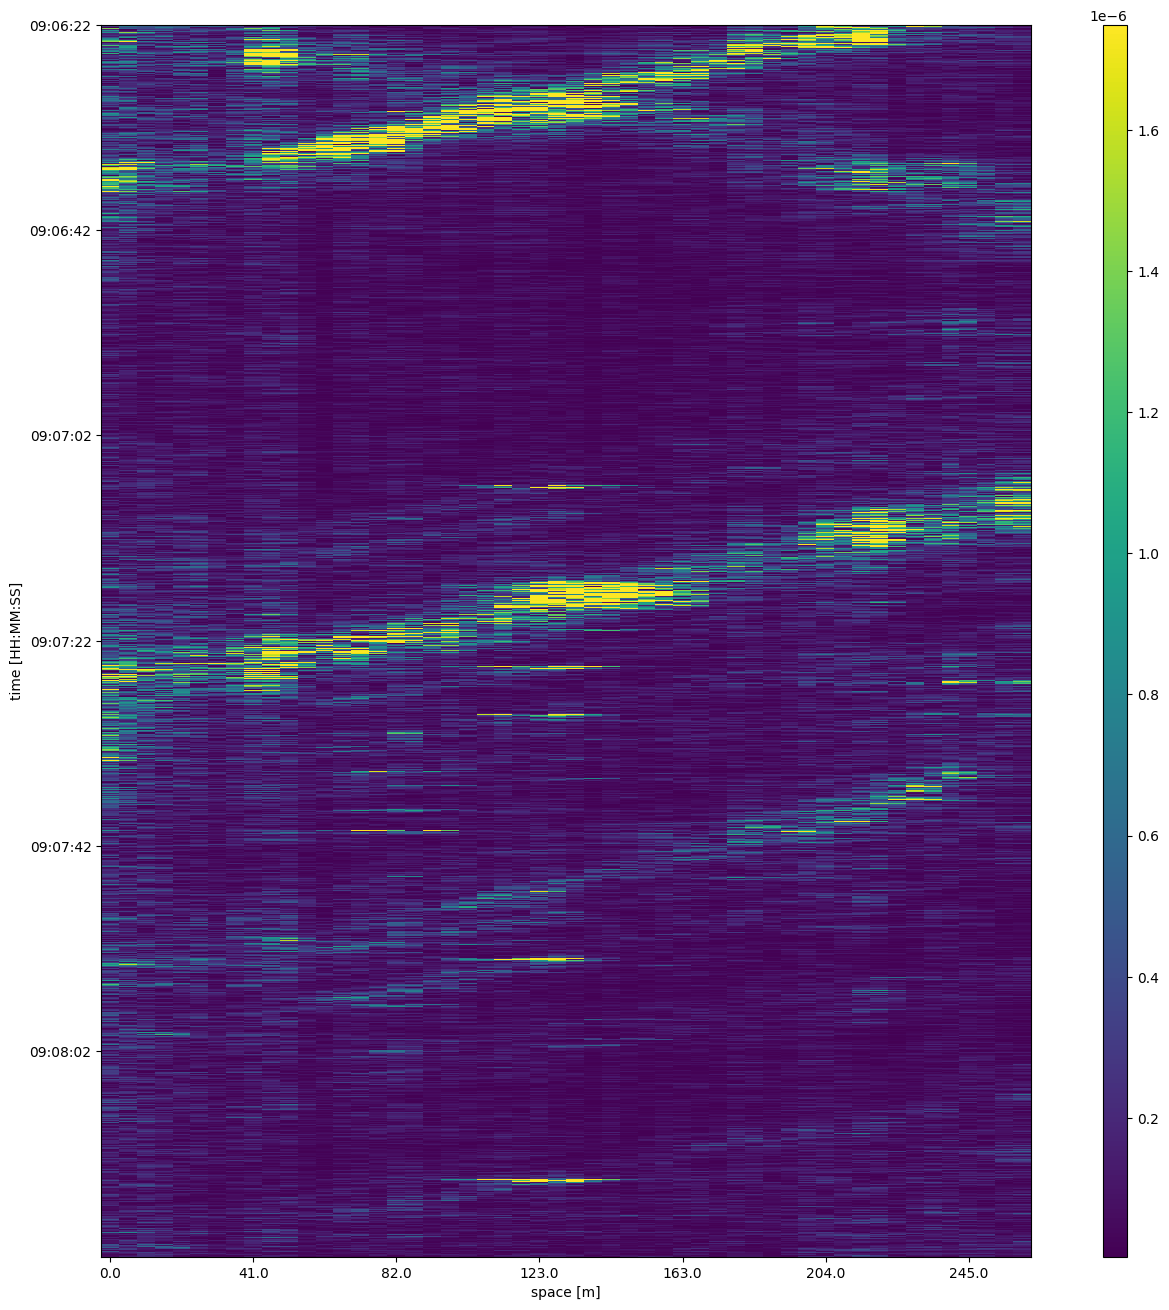

In [46]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df -= df.mean()
df = np.abs(df) 
low, high = np.percentile(df, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
print(im)
plt.ylabel('time [HH:MM:SS]')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


In [7]:
np.info(df.values)
print("Max:", np.max(df))
print("Min:", np.min(df))
print("Mean:", np.mean(df))
print(np.percentile(df, [0, 5, 25, 50, 75, 95, 100]))

class:  ndarray
shape:  (75000, 52)
strides:  (208, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x324dfc000
byteorder:  little
byteswap:  False
type: float32
Max: 3.2452244e-05
Min: 8.321686e-12
Mean: 1.3619434e-07
[8.32168622e-12 4.71473305e-09 2.96728437e-08 7.03445266e-08
 1.50203874e-07 4.46007135e-07 3.24522443e-05]


In [8]:
def plotting_function(data, idx, cols, norm=None):
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

def display_gray(data, idx, cols, norm=None):
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm, cmap='gray')
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto', cmap='gray')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

## **Step 0** ##

### **a) Plotting raw data** ###

In [34]:
# plt.imshow(data, aspect='auto', origin='lower', cmap='plasma')
# plt.colorbar(label='Amplitude')
# plt.title('DAS Data: Heatmap')
# plt.xlabel('Time')
# plt.ylabel('Distance')
# plt.show()

### **b) Min-Max normalization** ###

In [47]:
# low, high = np.percentile(df, [0, 100]) 
# norm = Normalize(vmin=low, vmax=high, clip=True)

# plotting_function(abs(data), index, columns, norm)

### **b) Min-Max Normalization upgraded** ###

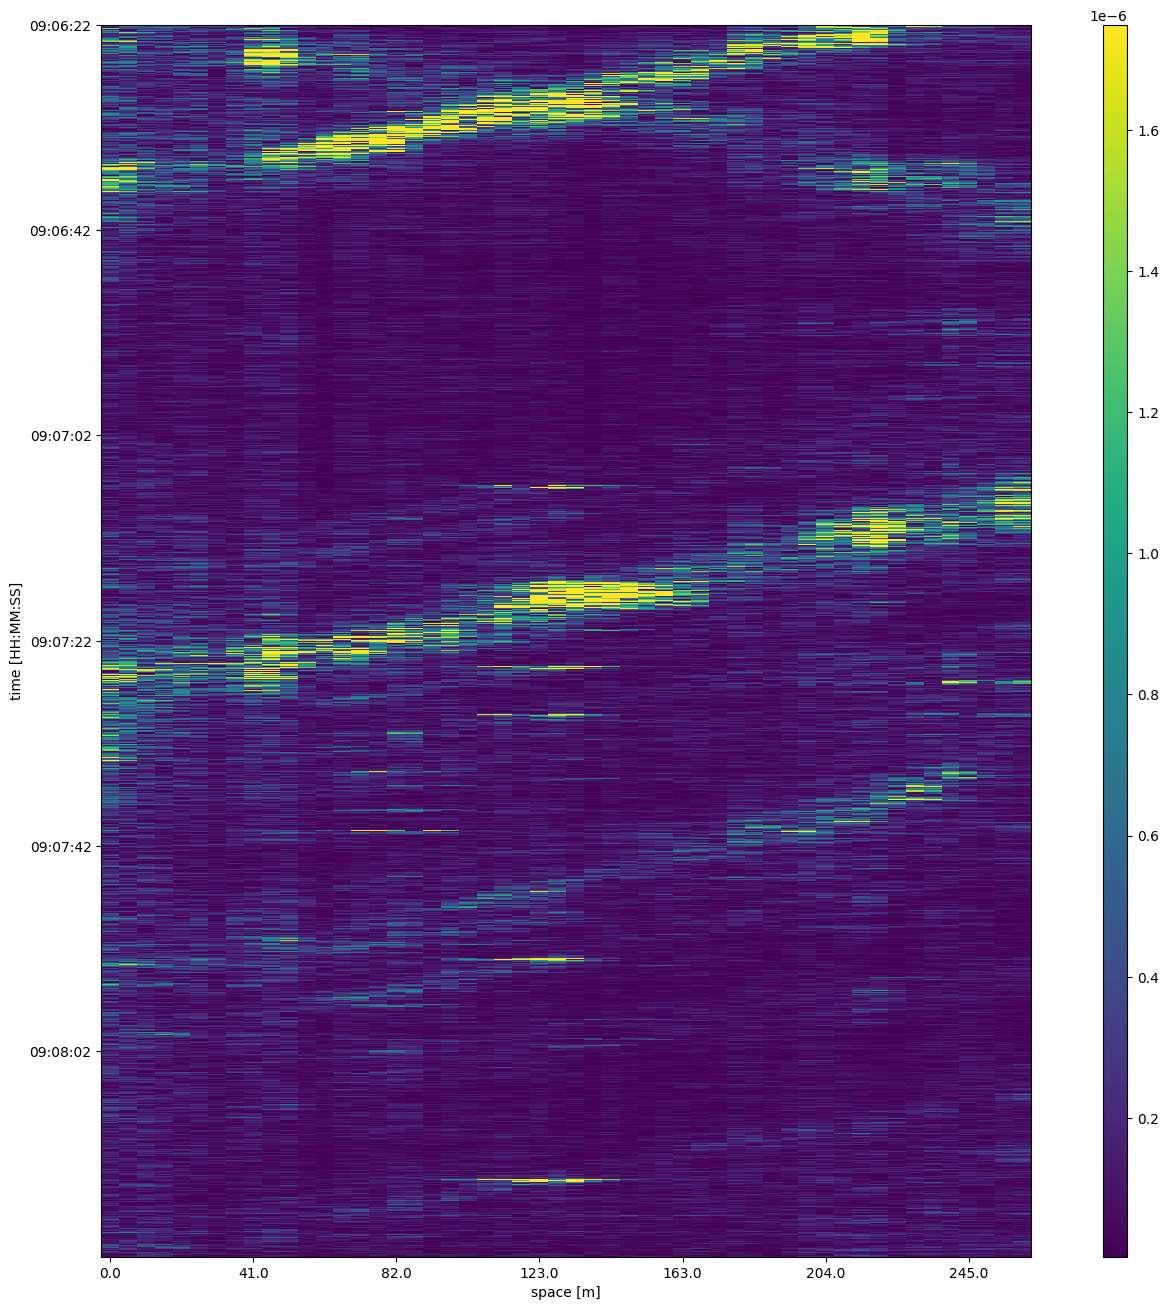

In [48]:
low, high = np.percentile(df, [3, 99]) 
norm_mm = Normalize(vmin=low, vmax=high, clip=True)

plotting_function(abs(data), index, columns, norm_mm)

### **c) Log scaling** ###

In [49]:
# low, high = np.percentile(df, [2, 98]) 
# norm_log = LogNorm(vmin=low, vmax=high, clip=True)

# plotting_function(abs(data), index, columns, norm_log)

### **d) Power Norm Scaling** ###

In [50]:
# low, high = np.percentile(df, [2, 98]) 
# norm_power = PowerNorm(vmin=low, vmax=high, clip=True, gamma = 2) #The higher gamma, the less noise we have in data but also less data

# plotting_function(abs(data), index, columns, norm_power)

### **d) Standardized data** ###

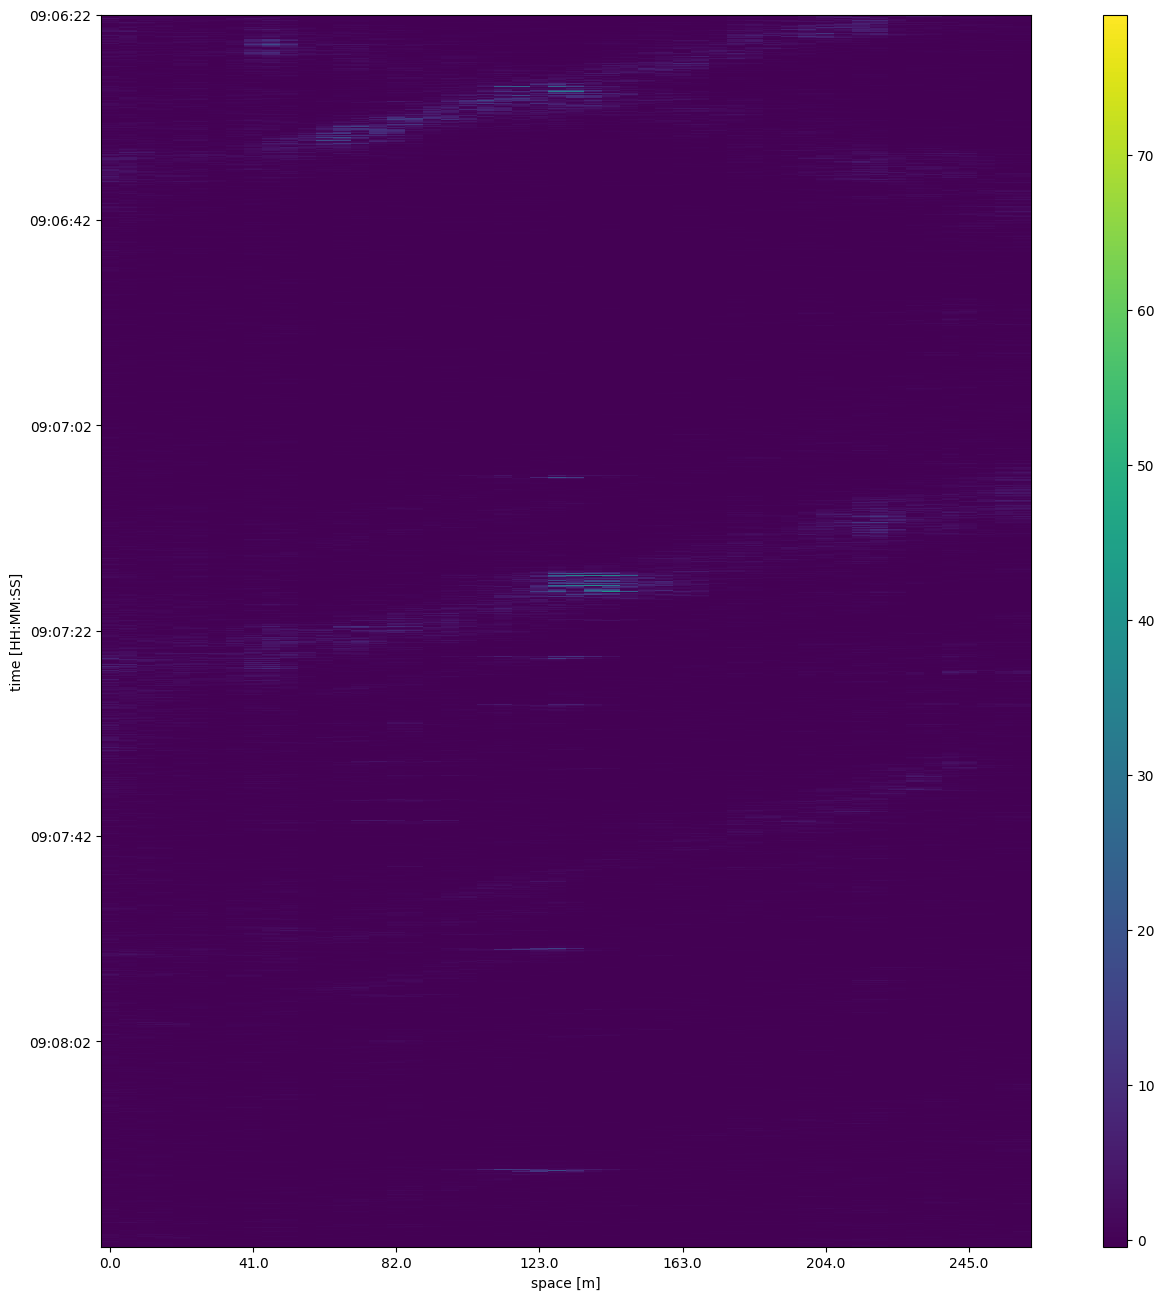

In [51]:
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

plotting_function(standardized_data, index, columns)

### **e) Grayscale image** ###

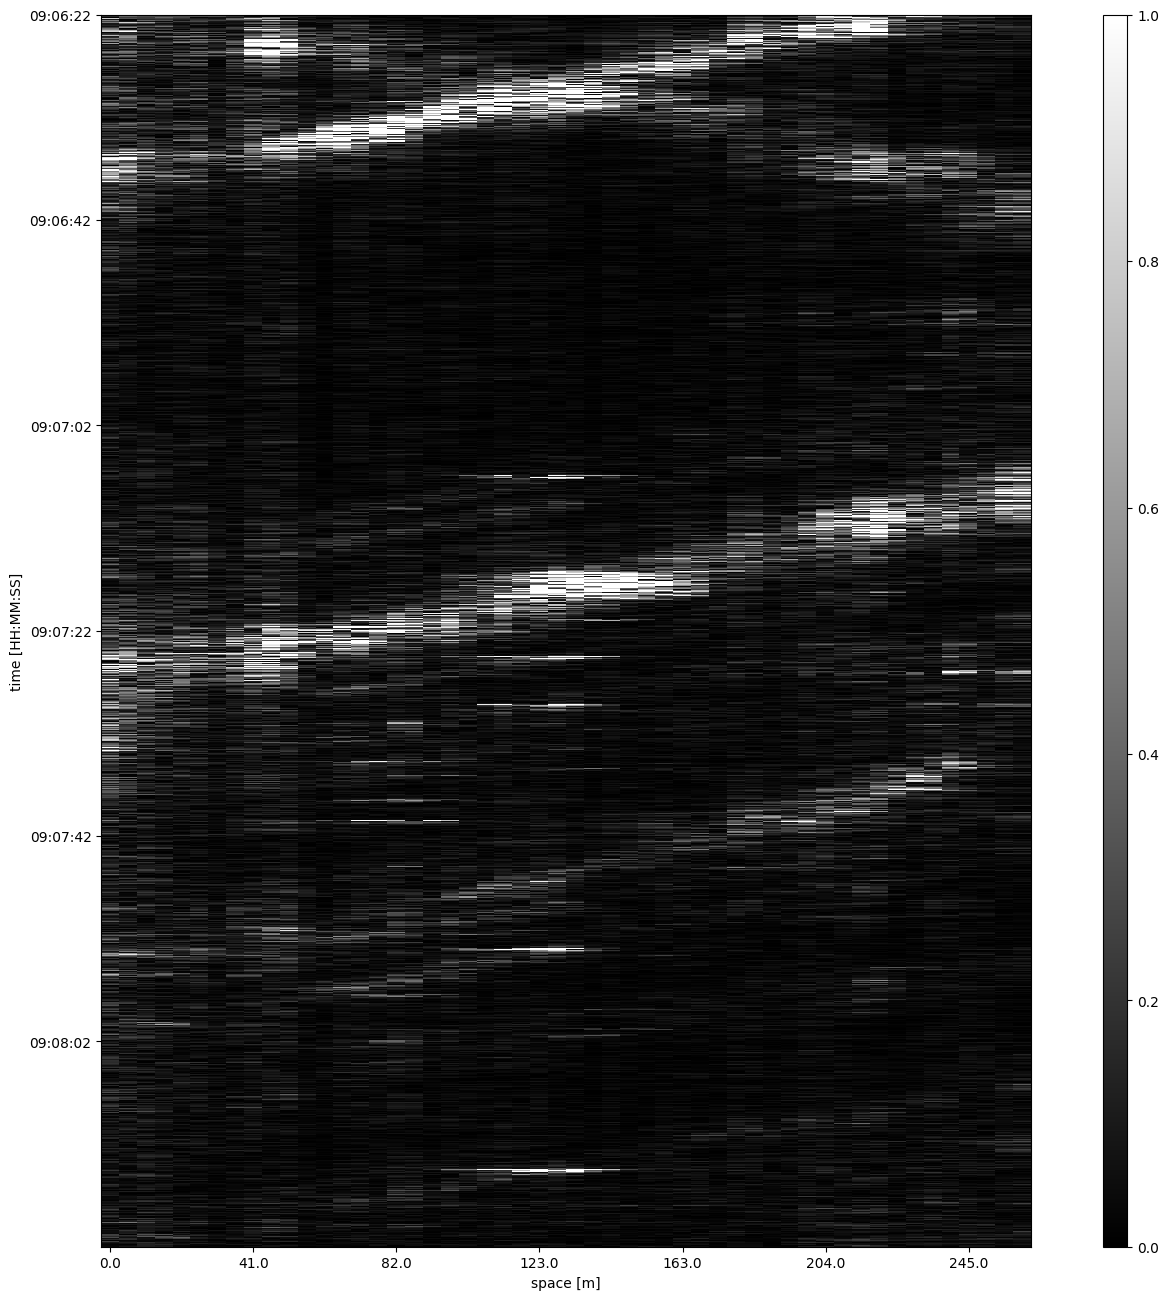

In [52]:
norm_mm_data = norm_mm(abs(data))
# norm_log_data = norm_log(abs(data))
# norm_power_data = norm_power(abs(data))
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

display_gray(norm_mm_data, index, columns)

In [53]:
# display_gray(norm_log_data, index, columns)

In [54]:
# display_gray(norm_power_data, index, columns)

### **f) Binarized Image** ###

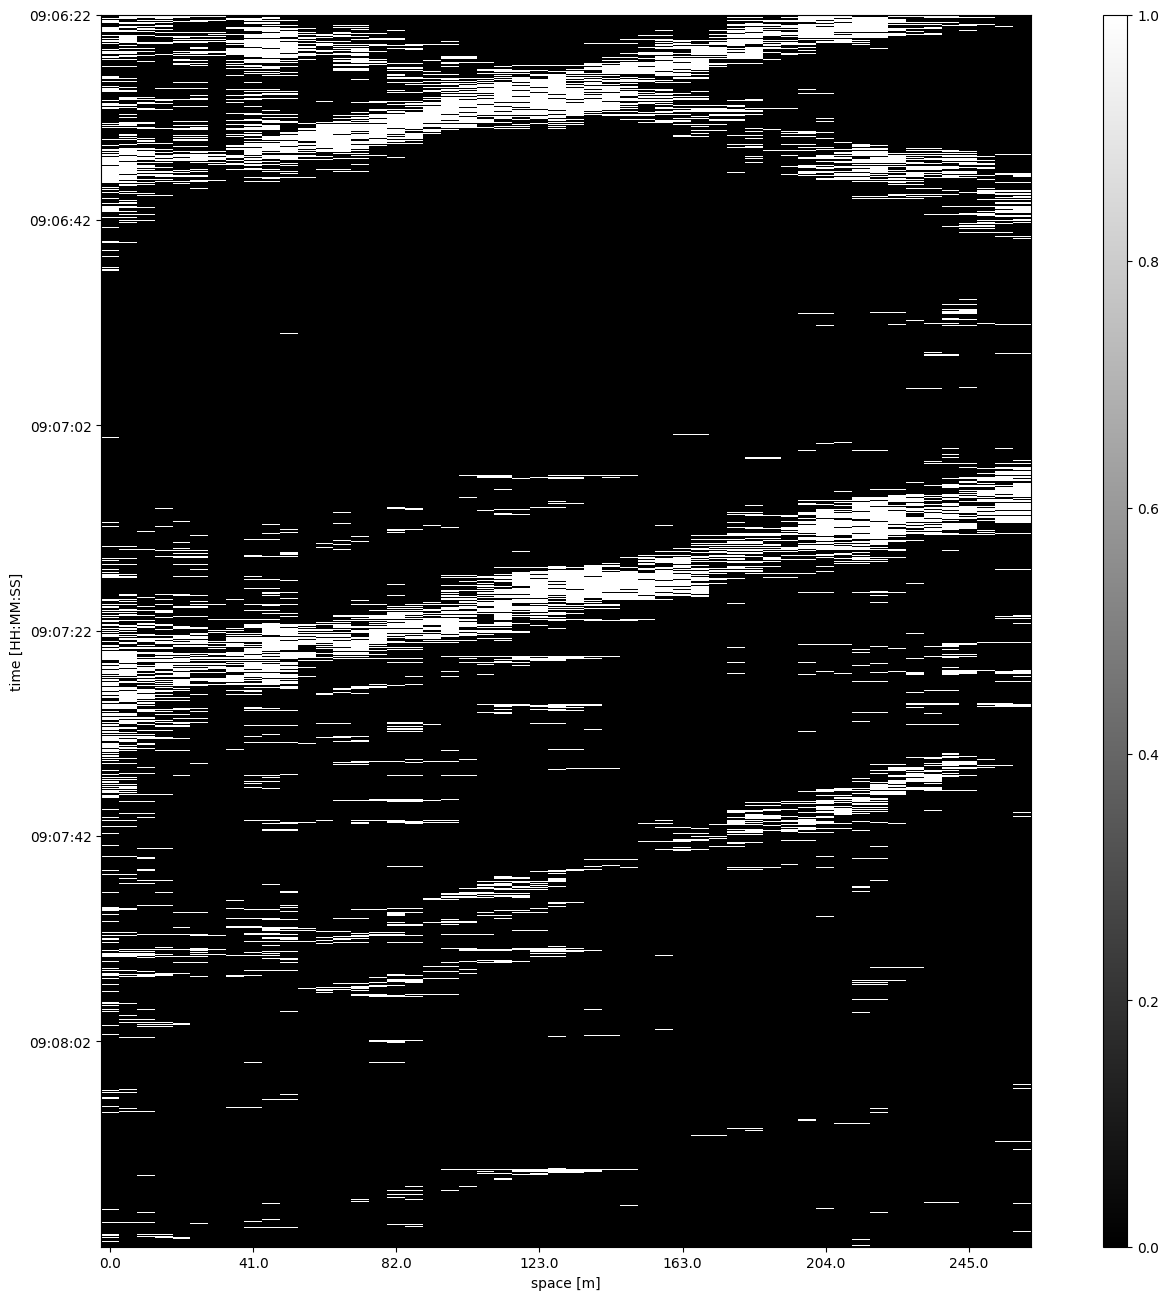

In [55]:
threshold = np.percentile(standardized_data, [86])
binarized_img = norm_mm_data > threshold
display_gray(binarized_img, index, columns) # No matter which data we take, result is always the same

### **g) Morphological operations** ###

#### **1. Proper Closing** ####

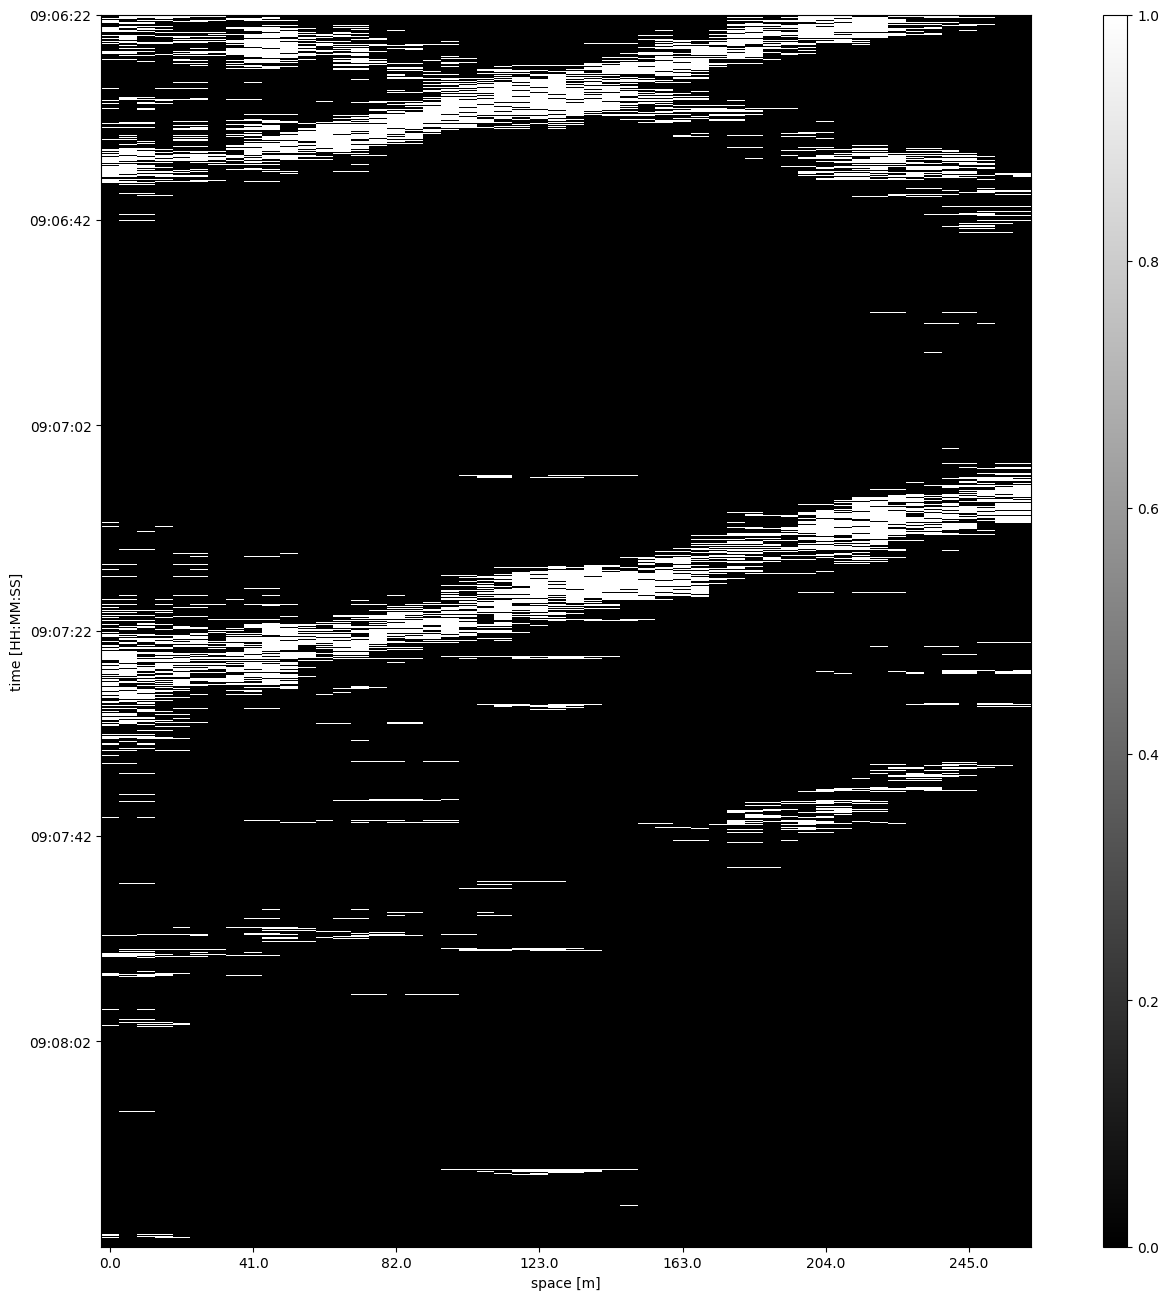

In [56]:
struct = np.ones([5, 5], np.uint8)

operation_1a = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct)
operation_1b = cv2.morphologyEx(operation_1a, cv2.MORPH_OPEN, struct)
operation_1c = cv2.morphologyEx(operation_1b, cv2.MORPH_CLOSE, struct)
operation_1 = np.minimum(binarized_img, operation_1c)

display_gray(operation_1, index, columns)

#### **2. Proper Opening** ####

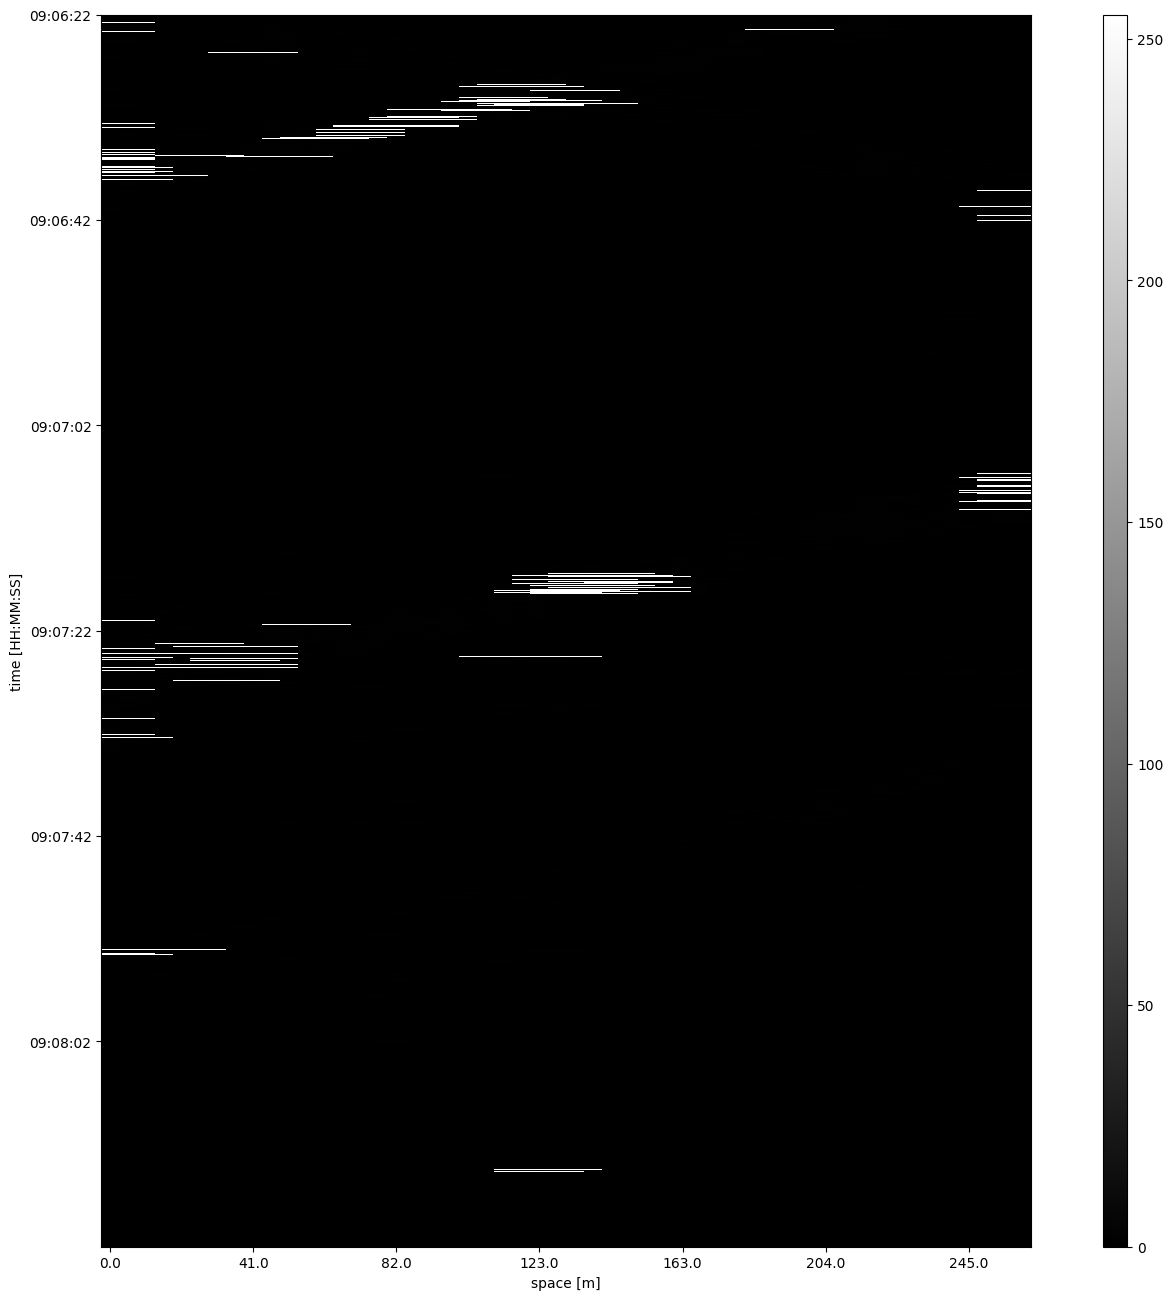

In [57]:
operation_2a = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_OPEN, struct)
operation_2b = cv2.morphologyEx(operation_2a, cv2.MORPH_CLOSE, struct)
operation_2c = cv2.morphologyEx(operation_2b, cv2.MORPH_OPEN, struct)
operation_2 = np.maximum(binarized_img, operation_2c)

display_gray(operation_2, index, columns)

#### **Automedian Filter** ####

In [58]:
def automedian_filter(img, struct):
    img_c = cv2.morphologyEx(img, cv2.MORPH_CLOSE, struct)
    img_co = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, struct)
    img_coc = cv2.morphologyEx(img_co, cv2.MORPH_CLOSE, struct)

    img_o = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct)
    img_oc = cv2.morphologyEx(img_o, cv2.MORPH_CLOSE, struct)
    img_oco = cv2.morphologyEx(img_oc, cv2.MORPH_OPEN, struct)

    Q_f = np.minimum(img_coc, img)
    A_f = np.maximum(Q_f, img_oco)

    return A_f

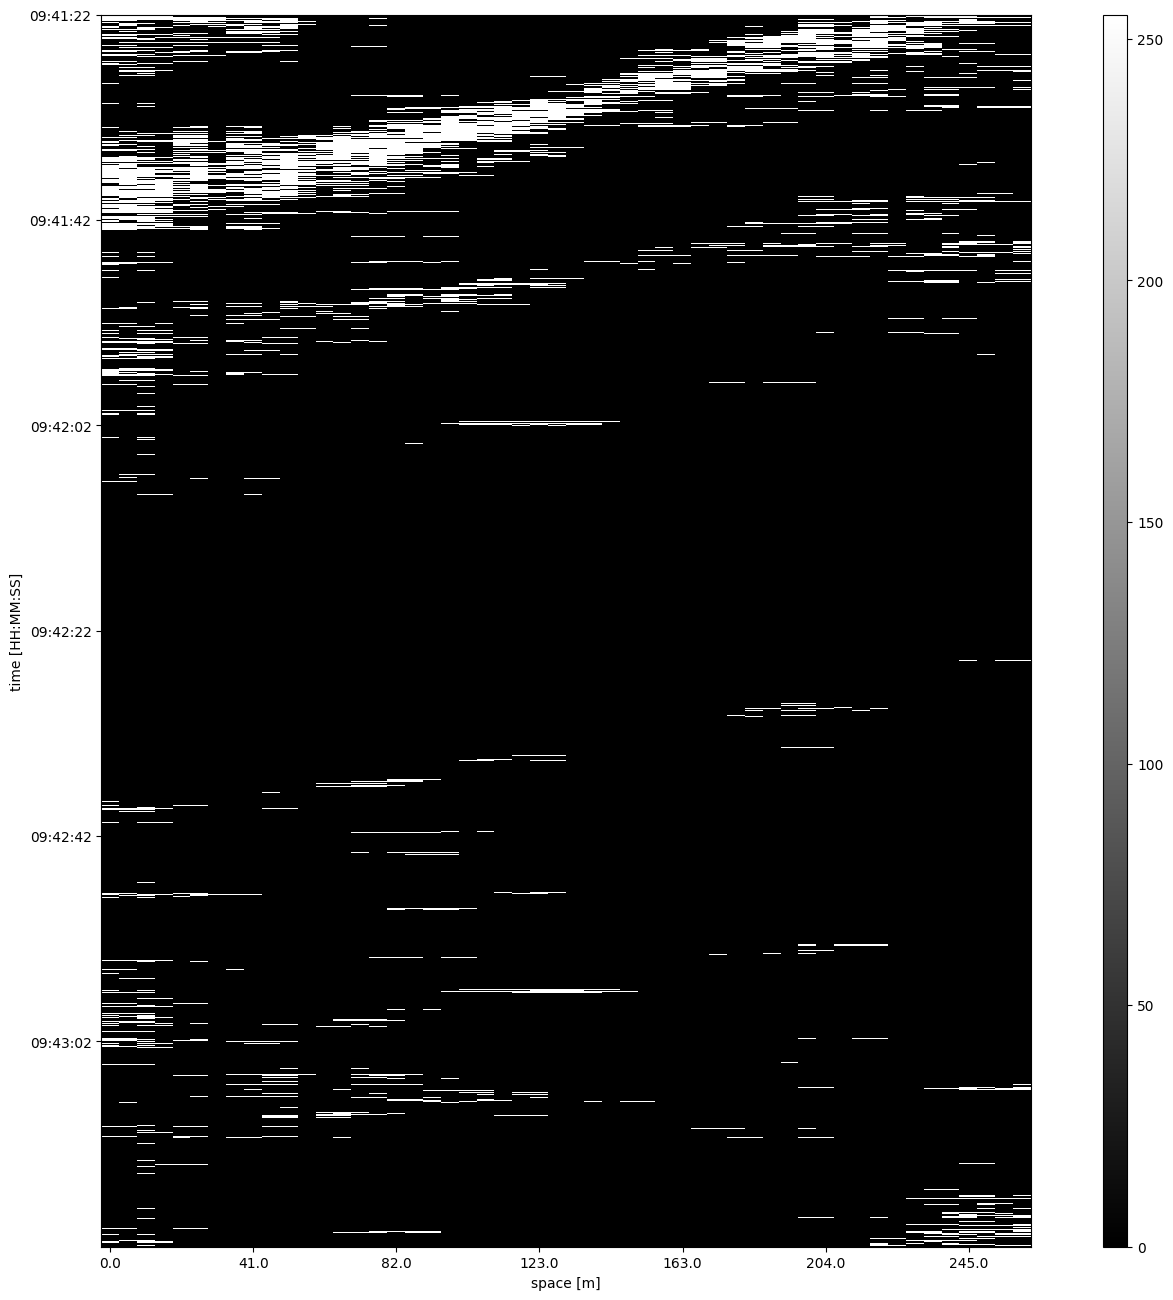

In [22]:
operation_3 = automedian_filter(binarized_img.astype(np.uint8) * 255, struct) # AUTOMEDIAN FILTER
display_gray(operation_3, index, columns)

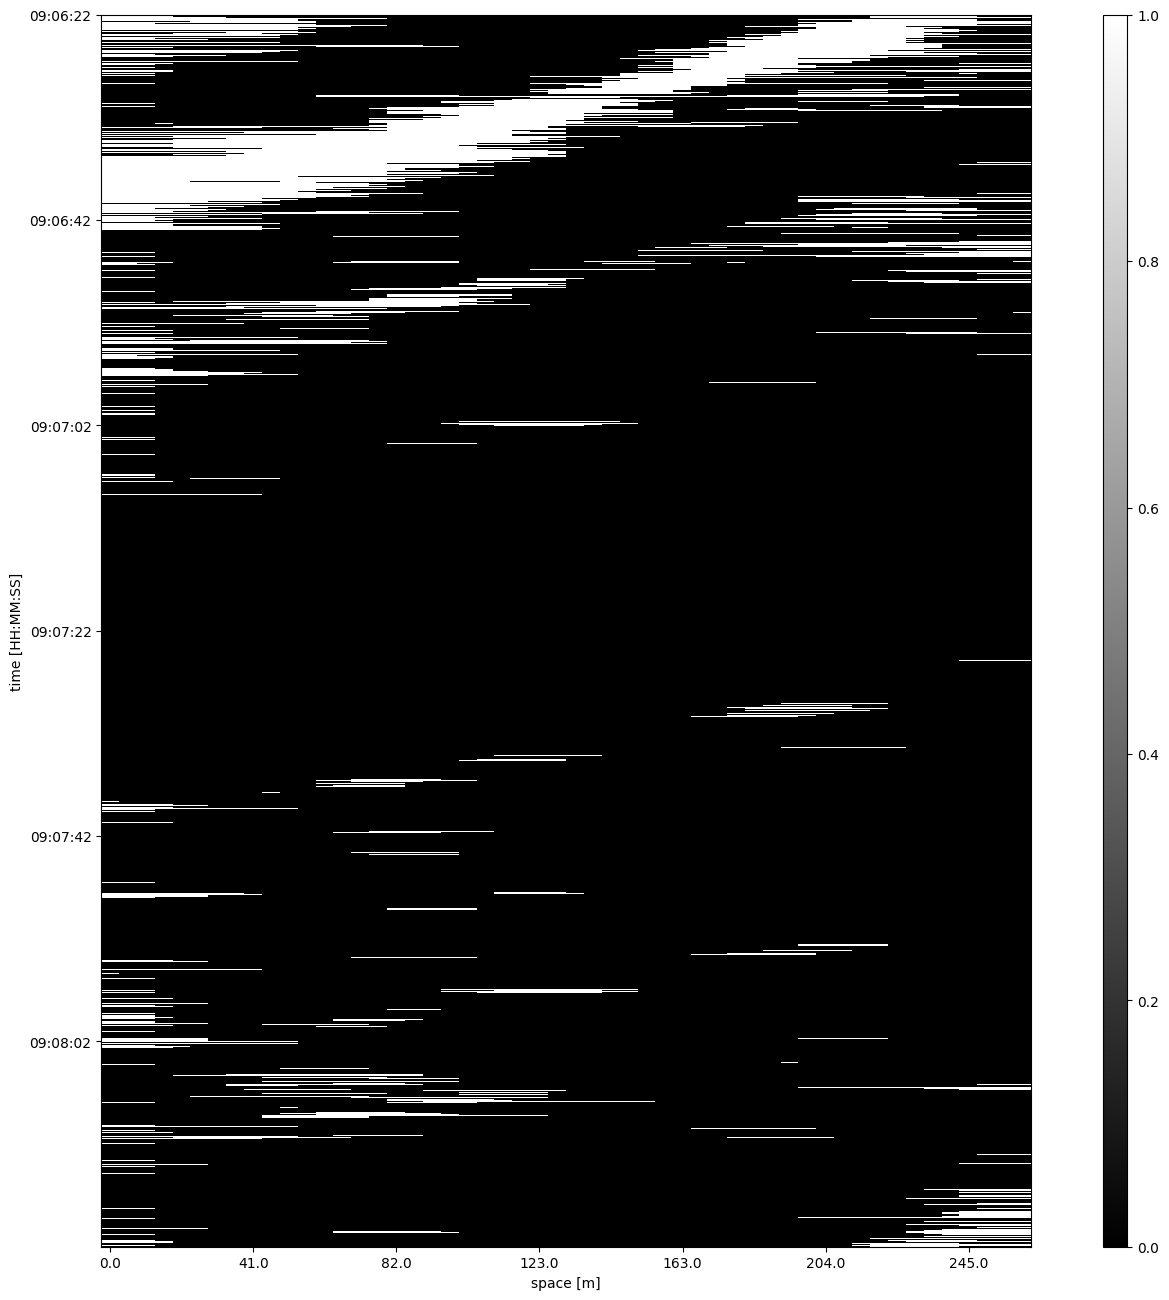

In [59]:
operation_4 = cv2.morphologyEx(operation_3.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # AUTOMEDIAN FILTER, CLOSING
display_gray(operation_4, index, columns)

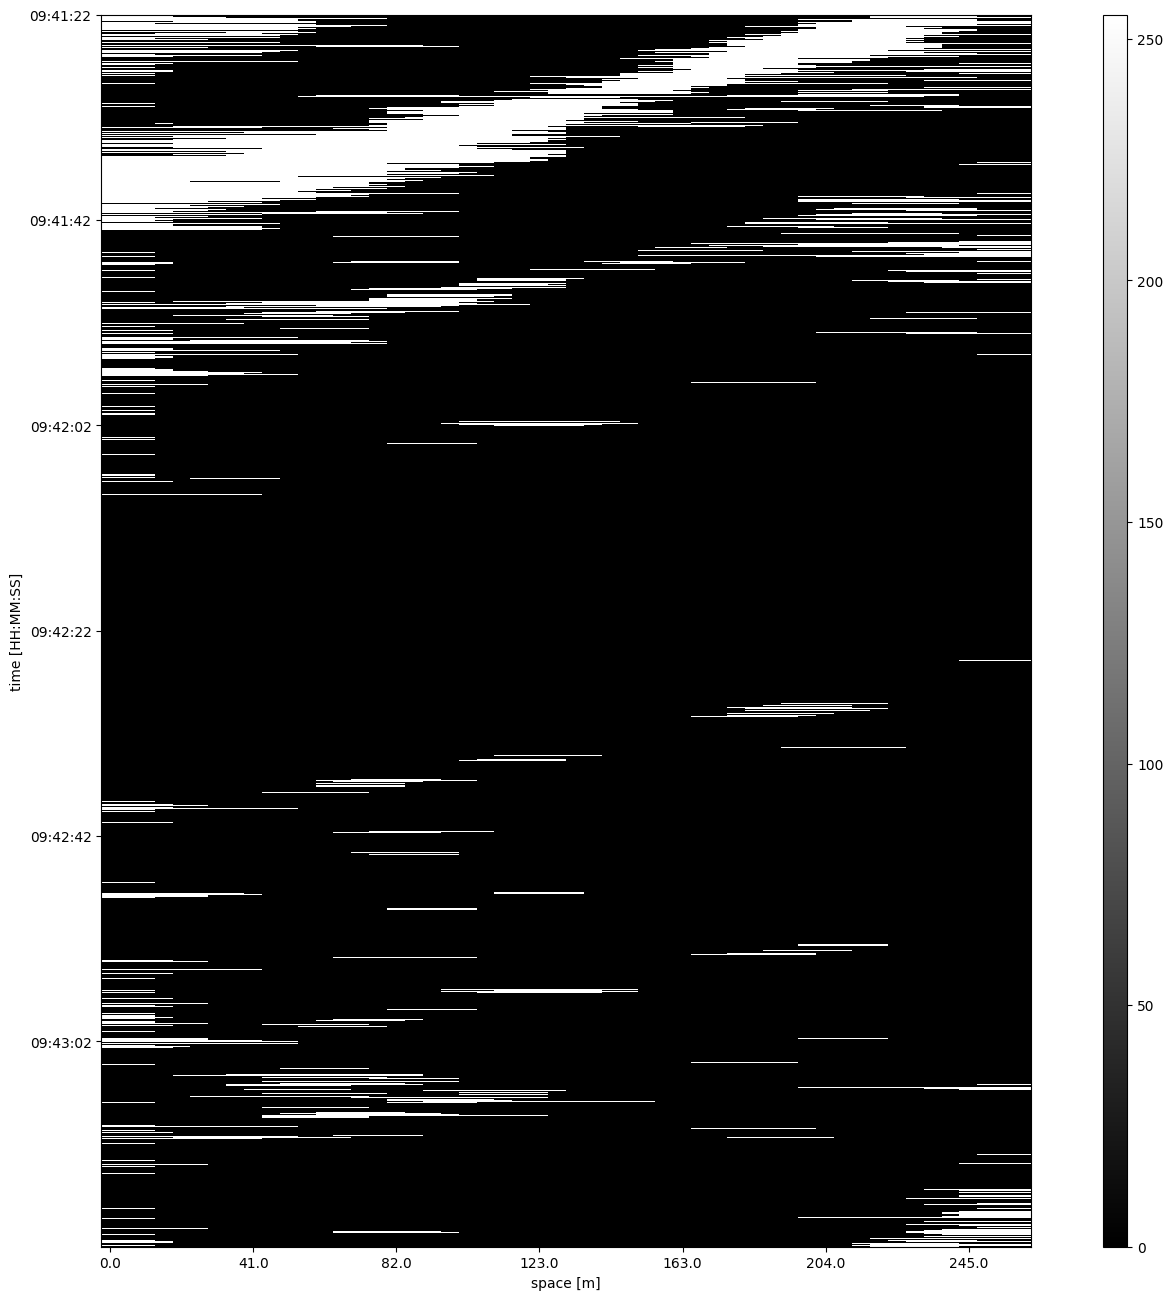

In [24]:
operation_5 = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # CLOSING
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN 2
display_gray(operation_5, index, columns)

In [60]:
from numpy.lib.stride_tricks import as_strided

def match(img,struct):
    pad_width= (struct.shape[0] - 1) // 2
    pad_height = (struct.shape[1] - 1) // 2
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=-2)
    window_shape = struct.shape
    output_shape = (padded_img.shape[0] - window_shape[0] + 1, padded_img.shape[1] - window_shape[1] + 1)
    strides = padded_img.strides * 2
    windowed_img = as_strided(padded_img, shape=output_shape + window_shape, strides=strides)
    return windowed_img
    

def dilate(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
    windowed_img = match(img, struct)
    match_1 = (windowed_img == 0) & (struct == -1) 
    match_2 = (windowed_img == 1) & (struct == 1)
    dilation_matches = match_1 | match_2
    dilated_img = np.max(dilation_matches, axis=(-2, -1))
    return dilated_img
def erode(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
    windowed_img = match(img, struct)
    match_1 = (windowed_img == 0) & (struct == -1) 
    match_2 = (windowed_img == 1) & (struct == 1)
    match_3 = (struct==0)
    erode_matches = match_1 | match_2 |match_3
    eroded_img = np.min(erode_matches, axis=(-2, -1))
    return eroded_img

def skeletonize(img):
    skeleton = np.logical_not(img.copy())
    skeleton_pr = None

    shape = skeleton.shape

    if (shape[0] != shape[1]):
        padding = (shape[0] - shape[1])//2
        rem = shape[0] - shape[1] - 2 * padding

    del shape

    s1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]])
    s2 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])

    change = True
    iteration = 0

    while change and iteration < 25:
        iteration += 1
        print(iteration)
        for _ in range(4):
            hit_or_miss_1 = erode(skeleton, s1)
            neg_hit_or_miss_1 = np.logical_not(hit_or_miss_1)
            skeleton = np.logical_and(skeleton, neg_hit_or_miss_1)
            del neg_hit_or_miss_1, hit_or_miss_1

            hit_or_miss_2 = erode(skeleton, s2)
            neg_hit_or_miss_2 = np.logical_not(hit_or_miss_2)
            skeleton = np.logical_and(skeleton, neg_hit_or_miss_2)
            del neg_hit_or_miss_2, neg_hit_or_miss_2

            s1 = np.rot90(s1)
            s2 = np.rot90(s2)

        if np.all(skeleton == skeleton_pr):
                change = False
        skeleton_pr = skeleton.copy()
    return skeleton

In [61]:
# skeleton = skeletonize(binarized_img)

Original shape: (75000, 52)
Resized shape: (750, 572)


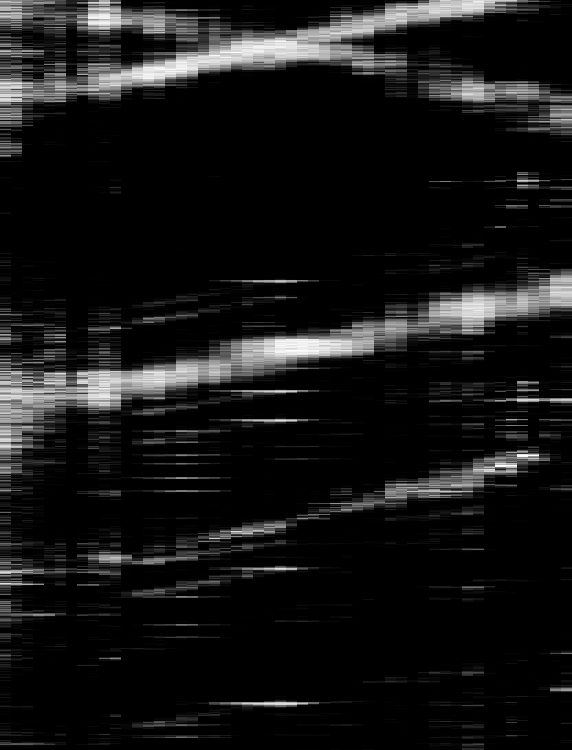

(750, 572)

In [62]:
def downsample_vertical(image, factor=100):
    return image.reshape(image.shape[0] // factor, factor, image.shape[1]).mean(axis=1)

# Expand image horizontally by repeating each pixel value 10 times
def expand_horizontal(image, factor=12):
    return np.repeat(image, factor, axis=1)

downsampled_image = downsample_vertical(binarized_img, factor=100)  # Downsample vertically
resized_image = expand_horizontal(downsampled_image, factor=11)   # Expand horizontally

print(f"Original shape: {norm_mm_data.shape}")
print(f"Resized shape: {resized_image.shape}")

# Normalize the resized image to the range 0-255
def scale_to_255(image):
    scaled_image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to 0-1
    return (scaled_image * 255).astype(np.uint8)  # Scale to 0-255 and convert to uint8

# Apply scaling
scaled_image = scale_to_255(resized_image)

imshow(scaled_image)
scaled_image.shape  


In [63]:
# from sklearn.cluster import DBSCAN

# gray = scaled_image.astype(np.uint8)
# print("Grayscaled:")
# # imshow(gray)

# thr = np.percentile(gray, [90])

# binarized = (gray > thr).astype(np.uint8) * 255
# print("Binarized")
# # imshow(binarized)

# gray_auto = automedian_filter(binarized, np.ones((7, 7)))
# print("Grayscaled, automedian:")
# # imshow(gray_auto)

# gray_bl = cv2.GaussianBlur(gray_auto, (21, 21), 1)
# print("Grayscaled, automedian, blurred")
# # imshow(gray_bl)

# img_after_pre = gray_bl.copy()
# # imshow(img_after_pre)

# tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 361, endpoint=False)
# h, theta, d = hough_line(img_after_pre, theta=tested_angles)

# accumulator, angles, distances = hough_line_peaks(h, theta, d)

# # Combine distances and angles for clustering
# lines = np.column_stack((distances, angles))

# # Apply DBSCAN clustering
# dbscan = DBSCAN(eps = 36, min_samples=1).fit(lines)  # Adjust eps for clustering sensitivity
# unique_labels = set(dbscan.labels_)

# # Filter lines: Keep the most prominent line (highest accumulator) from each cluster
# filtered_lines = []
# for label in unique_labels:
#     cluster_indices = np.where(dbscan.labels_ == label)[0]
#     if cluster_indices.size > 0:
#         # Select the line with the highest accumulator value in the cluster
#         max_acc_idx = cluster_indices[np.argmax(accumulator[cluster_indices])]
#         filtered_lines.append((distances[max_acc_idx], angles[max_acc_idx]))

# # Visualization: Detected lines overlaid on the original image
# fig = plt.figure(figsize=(12, 16))
# ax = plt.axes()
# ax.imshow(img_after_pre)
# ax.set_ylim((img_after_pre.shape[0], 0))
# ax.set_xlim((0, img_after_pre.shape[1]))

# # Overlay filtered lines
# for dist, angle in filtered_lines:
#     # Example speed calculation (optional, adjust as needed)
#     speed = 1 / (abs(np.tan(angle + np.pi / 2) * (1100 * dt) / dx)) * 3.6
#     if 30 < speed < 150:  # Filter lines based on speed
#         x0, y0 = dist * np.array([np.cos(angle), np.sin(angle)])
#         ax.axline(
#             (x0, y0),
#             slope=np.tan(angle + np.pi / 2),
#             color='red',
#             linewidth=2,
#             linestyle='--',
#             label=f"Slope: {np.tan(angle + np.pi / 2):.3f}, Speed: {speed:.1f} km/h",
#         )

# # Add legend for line parameters
# ax.legend(loc='upper right', fontsize='small')
# plt.tight_layout()
# plt.show()

In [64]:
def compute_intersections(distances, angles, img_shape):
    """Compute the intersection points of lines with the image edges."""
    intersections = []
    height, width = img_shape

    for dist, angle in zip(distances, angles):
        # Compute line parameters
        a, b = np.cos(angle), np.sin(angle)
        x0, y0 = a * dist, b * dist  # Closest point to the origin
        slope = -a / b if b != 0 else np.inf  # Slope of the line

        # Compute intersection points with image edges
        points = []
        # Intersect with vertical edges (x=0 and x=width)
        if slope != np.inf:
            points.append((0, y0 - slope * x0))  # x = 0
            points.append((width, y0 + slope * (width - x0)))  # x = width

        # Intersect with horizontal edges (y=0 and y=height)
        if slope != 0:
            points.append((x0 - y0 / slope, 0))  # y = 0
            points.append((x0 + (height - y0) / slope, height))  # y = height

        # Keep valid points within the image boundaries
        valid_points = [(x, y) for x, y in points if 0 <= x <= width and 0 <= y <= height]
        intersections.append(valid_points)

    return intersections

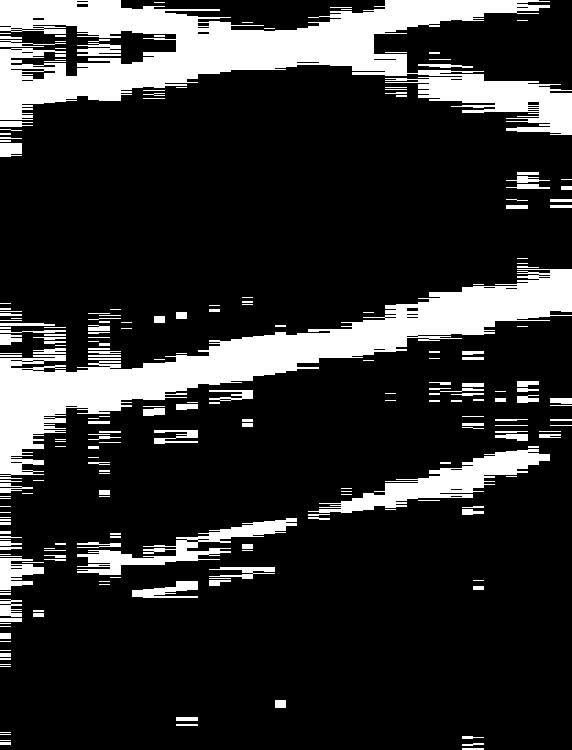

In [65]:
imshow(automedian_filter((scaled_image > 25).astype(np.uint8) * 255, np.ones((7, 7))))

/var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/ipykernel_21688/1983085919.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
/var/folders/8m/nx_b_wh17dg77b9kb95gxng80000gp/T/ipykernel_21688/1983085919.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)


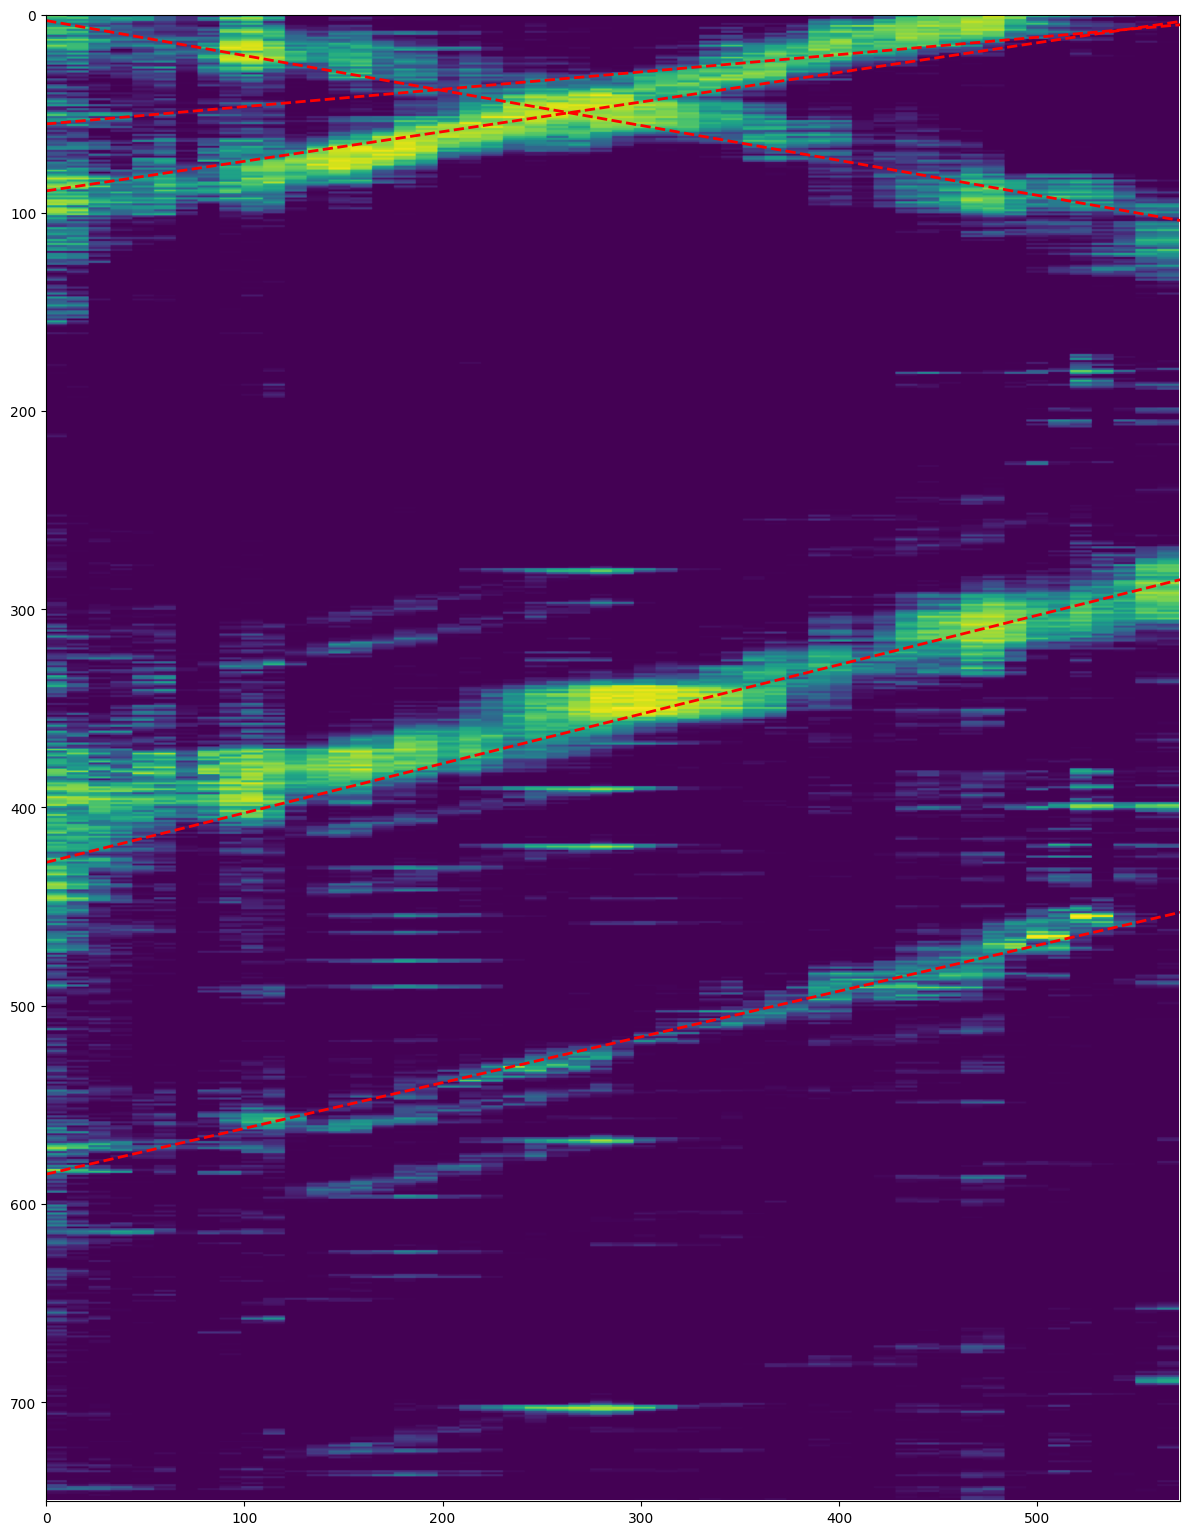

In [102]:
from sklearn.cluster import DBSCAN
from skimage.transform import hough_line, hough_line_peaks


# DETECTING STREAKS NEAR BOUNDARIES WITH PADDING

# Hough
# scaled_img = automedian_filter(scaled_image, np.ones((5, 5)))
scaled_img = scaled_image
pad_h = int(0.15 * scaled_img.shape[0])
scaled_img_pad = np.pad(scaled_img, ((pad_h, pad_h), (0, 0)), "edge")

# Hough Transform on the scaled image
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(scaled_img, theta=tested_angles)
h_pad, theta_pad, d_pad = hough_line(scaled_img_pad, theta=tested_angles)

# Visualization: Detected lines overlaid on the original image
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(scaled_img)
ax.set_ylim((scaled_img.shape[0], 0))  # Flip y-axis
ax.set_xlim((0, scaled_img.shape[1]))  # Set x-axis limits

lines = []
# detect lines
for accumulator, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    slope = np.tan(angle + np.pi / 2)
    speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
    # Filter lines based on speed and accumulator value (strength of the line) 420 on mine and Kuba's
    if 40 < speed < 130 and accumulator > 420:
        lines.append((dist, angle, slope, speed))

# detect lines close to boundaries by using padded img
for accumulator, angle, dist in zip(*hough_line_peaks(h_pad, theta_pad, d_pad)): 
    slope = np.tan(angle + np.pi / 2)
    speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
    # Filter lines based on speed and accumulator value (strength of the line) and verifying that they are trully close to borders 500 mine
    if 40 < speed < 120 and accumulator > 500 and (750 <abs(dist-pad_h) or abs(dist-pad_h) < 100):
        lines.append((dist-pad_h, angle, slope, speed))

        
lines = sorted(lines, key=lambda x: -x[0])
true_lines = []

previous_dist = None
previous_speed = None
previous_slope = None

for dist, angle, slope, speed in lines:
    if previous_dist is None or previous_dist - dist > 25 or speed < previous_speed or slope * previous_slope < 0:
        # Append the line to true_lines
        true_lines.append((dist, angle, slope, speed))
        
        # Update previous line properties
        previous_dist = dist
        previous_speed = speed
        previous_slope = slope

for dist, angle, slope, speed in true_lines:
    x0, y0 = (dist) * np.array([np.cos(angle), np.sin(angle)])
    ax.axline(
            (x0, y0),
            slope=slope,
            color='red',
            linewidth=2,
            linestyle='--',
            label=f"Slope: {slope:.3f}, Speed: {speed:.1f} km/h, Dist: {abs(dist)}",
        )
        
        
# Add legend for line parameters
# ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()

In [67]:
dx= 5.106500953873407
dt= 0.0016

data = []
first_file = '20240507_cut_npy/090622.npy' #\\
last_file = '20240507_cut_npy/090812.npy' #\\
for file in files:
   if file >= first_file and file <= last_file:
      data.append(np.load(file))

data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_file.split("/")[-1].split(".")[0], "%Y-%m-%d %H%M%S") #\\
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)
df -= df.mean()
df = np.abs(df)

100.0 0.09090909090909091
AxesImage(shape=(75000, 52))


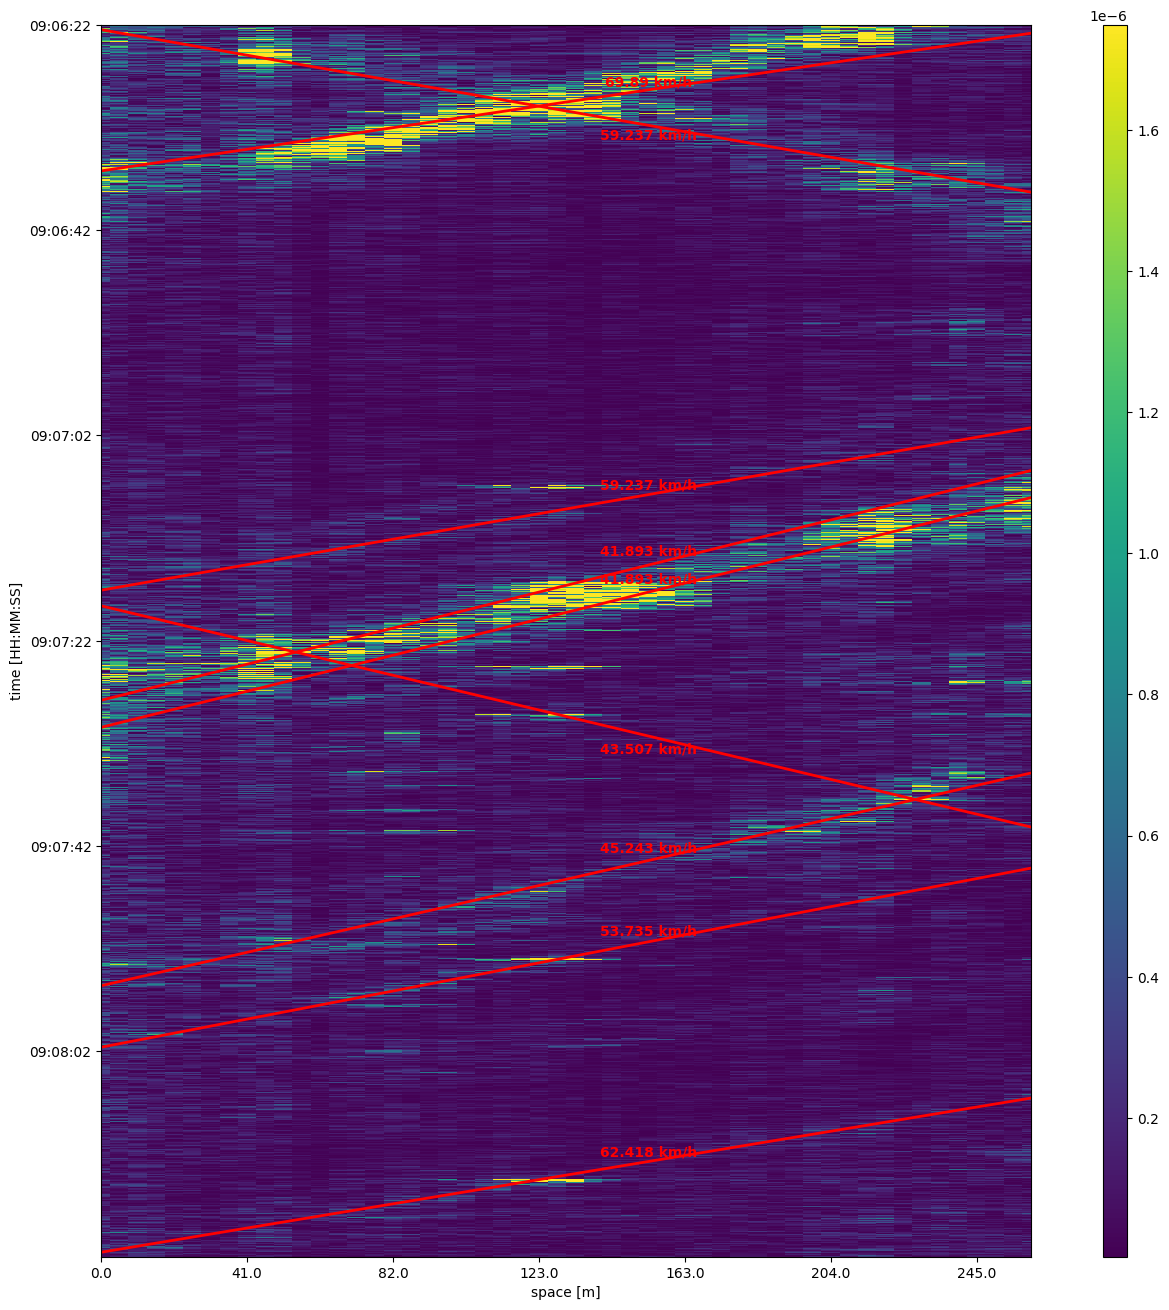

In [134]:
from math import sqrt

vertical_scale = norm_mm_data.shape[0] / scaled_image.shape[0] # 100
horizontal_scale = norm_mm_data.shape[1] / scaled_image.shape[1] # 1/11
print(vertical_scale, horizontal_scale)


tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(scaled_image, theta=tested_angles)
lines = list(zip(*hough_line_peaks(h, theta, d)))

fig = plt.figure(figsize=(12, 16))
ax = plt.axes()

# Display the original image
low, high = np.percentile(df, [3, 99])
norm = Normalize(vmin=low, vmax=high, clip=True)
im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
print(im)
plt.ylabel('time [HH:MM:SS]')
plt.xlabel('space [m]')

# Rescale and plot detected lines
for _, angle, dist in lines:
    if abs(np.rad2deg(angle)) > 75 and abs(np.rad2deg(angle)) < 82:
        # Rescale distance
        dist_original = dist * sqrt((np.cos(angle) / horizontal_scale) ** 2 + (np.sin(angle) / vertical_scale) ** 2) # done

        # Calculate points for the original scale
        (x0, y0) = dist * np.array([np.cos(angle) * horizontal_scale, np.sin(angle) * vertical_scale])

        # Adjust slope for horizontal scaling
        slope_original = np.tan(angle + np.pi / 2) * vertical_scale/horizontal_scale
        speed = np.where(slope_original != 0, 1 / (abs(slope_original) * (dt) / dx) * 3.6, 0)

        # Plot rescaled line
        ax.axline((x0, y0), slope=slope_original, color='red', linewidth=2)
        ax.text(30, slope_original * 33 + y0 - slope_original * x0, f"{np.round(speed, 3)} km/h", fontsize=10, color='red', ha='center', va='center', fontweight = 'bold')


# Add colorbar
cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
ax.set_ylim((74999, 0))
ax.set_xlim((0, 51))
plt.show()